<a href="https://colab.research.google.com/github/ShabnamParveen/BlogSystemWithPython/blob/main/Next_word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow     # to train deep neural network models
from tensorflow import keras
from keras.preprocessing.text import Tokenizer                #vectorize text corpus
from keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout, GRU,Activation, Conv1D          # neural network layers
from keras.models import Sequential         #neural network model for plain stack of layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as array_calculate     
import os
from keras.models import load_model
from prompt_toolkit.filters.utils import to_filter
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint 
import matplotlib.pyplot as p_l_t
import pandas as pd

print("impoting done without any failure!")


impoting done without any failure!


upload the text file as dataset

In [ ]:
from google.colab import files
_file = files.upload()

Saving my mother india.txt to my mother india.txt


Load, preprocess --> dataset

In [ ]:
text_sheet = open("my mother india.txt", "r",  encoding = "UTF8")

Storing the file into a list datatype

In [ ]:
text_lns = []
for line in text_sheet:
  text_lns.append(line)

Typecasting the created list(data) into string datatype

In [ ]:
text_material = ""
for j in text_lns:
  text_material = ' '.join(text_lns)

change the escape sequences to a single space

In [ ]:
text_data = text_material.replace('\n', ' ').replace('\r', ' ').replace('\ufeff', ' ').replace('"', ' ').replace('_', ' ').replace('*', ' ').replace('|', ' ').replace('-', ' ').replace('+', ' ')

Remove unnecessary spaces from the dataset

In [ ]:
text_data = text_data.split()
text_data = ' '.join(text_data)

printing some part of the dataset

In [ ]:
text_data[:5000]

'The Project Gutenberg eBook of My mother India, by Dalip Singh Saund This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: My mother India Author: Dalip Singh Saund Release Date: July 20, 2022 [eBook #68572] Language: English Produced by: Tim Lindell, Martin Pettit and the Online Distributed Proofreading Team at https://www.pgdp.net (This book was produced from images made available by the HathiTrust Digital Library.) START OF THE PROJECT GUTENBERG EBOOK MY MOTHER INDIA Transcriber’s note: Obvious typographic errors have been corrected. MY MOTHER INDIA by DALIP SINGH SAUND, M.A., Ph.D. [Illustrat

finding the length of the string stream in the preprocessed file

In [ ]:
len(text_data)

353678

Apply Tokenization

In [ ]:
data_tknzr = Tokenizer() # breaks down a piece of text into small units called TOKENS
data_tknzr.fit_on_texts([text_data]) # breaking text to tokens

~Saving the tolkenizer file for predict function

The Pickled file contains the model, the metrics from the testing, a list of variable names and their order in which they have to be inputted, the version of Keras and python used, and if a scaler is used it will also be stored in the file.


texts_to_sequences method helps in converting tokens of text corpus into a sequence of integers.

In [ ]:
pickle.dump(data_tknzr, open('token.pkl', 'wb'))

sqnc_of_dta =  data_tknzr.texts_to_sequences([text_data])[0]
sqnc_of_dta[:21]

[1,
 72,
 67,
 522,
 2,
 73,
 289,
 10,
 11,
 1344,
 619,
 1345,
 24,
 522,
 7,
 14,
 1,
 156,
 2,
 758,
 1131]

printing length of sequence data

In [ ]:
len(sqnc_of_dta)

60894

The above o/p is less than the original file length, because the above function gives integer values to unique words(words are repeated in the original file). Apart from this the above function also filters the functuation marks and spaces etc.

index 0 is reserve for padding so the vocab size will be incresed by 1

In [ ]:
vocabulary_length = len(data_tknzr.word_index) + 1
vocabulary_length

7649

In [ ]:
sqncs = [] 

for e in range(3, len(sqnc_of_dta)):
  wrd = sqnc_of_dta[e-3 : e+1]
  sqncs.append(wrd)

print('Sequence length: ', len(sqncs))
sqncs = array_calculate.array(sqncs)
sqncs[:20]

Sequence length:  60891


array([[   1,   72,   67,  522],
       [  72,   67,  522,    2],
       [  67,  522,    2,   73],
       [ 522,    2,   73,  289],
       [   2,   73,  289,   10],
       [  73,  289,   10,   11],
       [ 289,   10,   11, 1344],
       [  10,   11, 1344,  619],
       [  11, 1344,  619, 1345],
       [1344,  619, 1345,   24],
       [ 619, 1345,   24,  522],
       [1345,   24,  522,    7],
       [  24,  522,    7,   14],
       [ 522,    7,   14,    1],
       [   7,   14,    1,  156],
       [  14,    1,  156,    2],
       [   1,  156,    2,  758],
       [ 156,    2,  758, 1131],
       [   2,  758, 1131,    4],
       [ 758, 1131,    4,    1]])

separation of dependent and independent variables from the dataset

In [ ]:
X_input = [] 
y_output = []

for seq in sqncs:
  X_input.append(seq[0:3])
  y_output.append(seq[3])

X_input = array_calculate.array(X_input)
y_output = array_calculate.array(y_output) 

printing content of x variable

In [ ]:
print('input data vectors: ', X_input[:25])

input data vectors:  [[   1   72   67]
 [  72   67  522]
 [  67  522    2]
 [ 522    2   73]
 [   2   73  289]
 [  73  289   10]
 [ 289   10   11]
 [  10   11 1344]
 [  11 1344  619]
 [1344  619 1345]
 [ 619 1345   24]
 [1345   24  522]
 [  24  522    7]
 [ 522    7   14]
 [   7   14    1]
 [  14    1  156]
 [   1  156    2]
 [ 156    2  758]
 [   2  758 1131]
 [ 758 1131    4]
 [1131    4    1]
 [   4    1  194]
 [   1  194  176]
 [ 194  176    3]
 [ 176    3   69]]


printing Responses which is y variable

In [ ]:
print('Response data: ', y_output[:25])

Response data:  [ 522    2   73  289   10   11 1344  619 1345   24  522    7   14    1
  156    2  758 1131    4    1  194  176    3   69   47]


In [ ]:
y_output = to_categorical(y_output, num_classes=vocabulary_length)
y_output[:25]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#Creating the model

#sequential()-> for creating deeplearning model
embedding->layer
vocab_size->input dimension
10->o/p dimension
i/p_length-> 3-gram language model


In [ ]:
mdl_lstm = Sequential()
mdl_lstm.add(Embedding(vocabulary_length, 10, input_length=3))
mdl_lstm.add(LSTM(1000, return_sequences=True))
mdl_lstm.add(LSTM(1000))
mdl_lstm.add(Dense(1000, activation="relu"))
mdl_lstm.add(Dense(vocabulary_length, activation="softmax"))

In [ ]:
mdl_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             76490     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 7649)              7656649   
                                                                 
Total params: 20,782,139
Trainable params: 20,782,139
Non-trainable params: 0
_________________________________________________________________


#plot model to visualise it

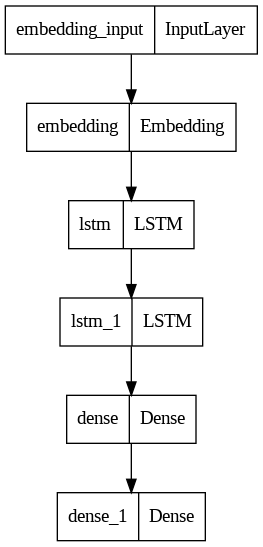

In [ ]:
keras.utils.plot_model(mdl_lstm, to_file= 'plotted_lstm_model.png', show_layer_names=True)

# #train ####################################

In [ ]:
chckpnt = ModelCheckpoint("nxt_word_prediction.h5", monitor="loss", verbose=1, save_best_only=True)
mdl_lstm.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
training_rcrds = mdl_lstm.fit(X_input, y_output, epochs=100, batch_size=64, callbacks=[chckpnt])
print(mdl_lstm)

Epoch 1/100
952/952 [==============================] - ETA: 0s - loss: 6.7700 - accuracy: 0.0943
Epoch 1: loss improved from inf to 6.77003, saving model to nxt_word_prediction.h5
952/952 [==============================] - 29s 24ms/step - loss: 6.7700 - accuracy: 0.0943
Epoch 2/100
952/952 [==============================] - ETA: 0s - loss: 6.2356 - accuracy: 0.1254
Epoch 2: loss improved from 6.77003 to 6.23564, saving model to nxt_word_prediction.h5
952/952 [==============================] - 17s 18ms/step - loss: 6.2356 - accuracy: 0.1254
Epoch 3/100
951/952 [============================>.] - ETA: 0s - loss: 5.8939 - accuracy: 0.1428
Epoch 3: loss improved from 6.23564 to 5.89335, saving model to nxt_word_prediction.h5
952/952 [==============================] - 17s 18ms/step - loss: 5.8934 - accuracy: 0.1429
Epoch 4/100
952/952 [==============================] - ETA: 0s - loss: 5.6041 - accuracy: 0.1574
Epoch 4: loss improved from 5.89335 to 5.60413, saving model to nxt_word_predictio

#plotting the model accuracy

In [ ]:
def ploting_achivement(hstry, infrmsn_lbl):
    p_l_t.plot(hstry.history[infrmsn_lbl])
    p_l_t.xlabel("Epochs")
    p_l_t.ylabel(infrmsn_lbl)
    p_l_t.show()

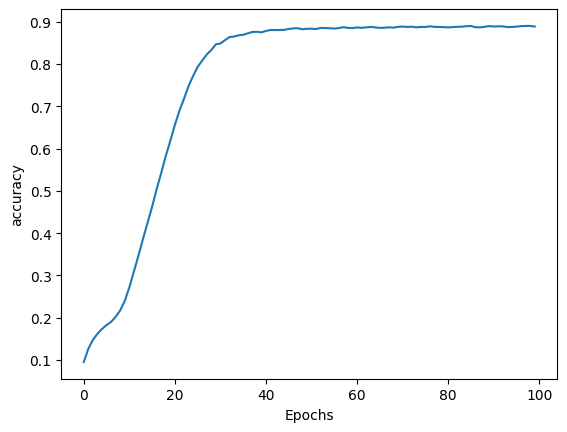

In [ ]:
ploting_achivement(training_rcrds, 'accuracy')

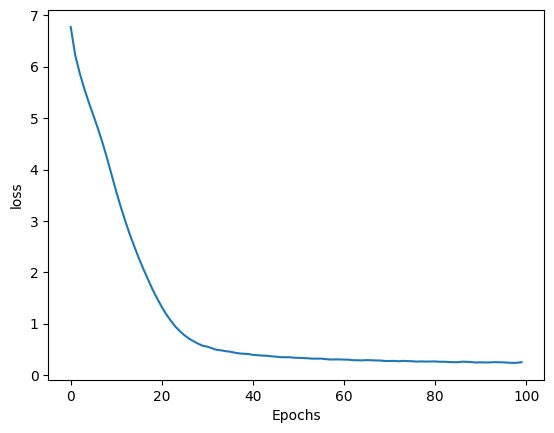

In [ ]:
ploting_achivement(training_rcrds, 'loss')

In [ ]:
#accuracy calculation
lstm_loss_and_metrics = mdl_lstm.evaluate(X_input, y_output, batch_size=64)
print("The accuracy of LSTM model is: "+str(lstm_loss_and_metrics[1]))

952/952 [==============================] - 9s 8ms/step - loss: 0.1962 - accuracy: 0.9137
The accuracy of LSTM model is: 0.9137310981750488


#prediction

# #loading learner, tokenizer

In [ ]:
mdl_lstm = load_model("nxt_word_prediction.h5")
data_tknzr = pickle.load(open('token.pkl', 'rb'))

#defining function for prediction

In [ ]:
def Foretell_Succeeding_Word(lrnr_mdl, tknzr, enteredTxt):
    sqnc = tknzr.texts_to_sequences([enteredTxt])
    sqnc = array_calculate.array(sqnc)
    divination = array_calculate.argmax(lrnr_mdl.predict(sqnc))
    nxt_wrd_res =""

    for key, value in tknzr.word_index.items():
        if value == divination:
            nxt_wrd_res = key
            break
    print(nxt_wrd_res)
    return nxt_wrd_res

In [ ]:
def keyboard(lrnr, tknzr):
    while(1):
        take = input("Enter string:  ")

        if take=="0":
            print('Execution Finished...')
            break;
        else:
            try:
                take = take.split(" ")
                take = take[-3:]
                print(take)

                Foretell_Succeeding_Word(lrnr, tknzr, take)

            except Exception as e:
                print('Something went wrong: ', e)
                continue

In [ ]:
def keyboard_test(lrnr, tknzr):
    
      take = "Are you feeling"
      #"In the second selection Rama is heard answering to the entreaties of Bharata, who has tried in vain to dissuade him from carrying out"
      #"The epic poems of _Ramayna_ and _Mahabharata_ consist of stories and legends which form a splendid superstructure on the teachings contained in the earlier scriptures of the _Vedas_. By relating what the men and women of those times thought, said, and did, these poems illustrate in a highly instructive manner the general character and culture of the early Hindus. The stories contained in these poems, which, in fact, rival the best known epic poems of the"
      #"I am a good"
      #"India, whose life rolled on while the West, like the dragon fly, lived and died to"

      if take=="0":
          print('Execution Finished...')
      else:
          try:
              take = take.split(" ")
              take = take[-3:]
              print(take)

              Foretell_Succeeding_Word(lrnr, tknzr, take)

          except Exception as e:
              print('Something went wrong: ', e)

#time efficiency measurement

In [ ]:
import time
t1 = time.time()
keyboard(mdl_lstm, data_tknzr)
t2 = time.time()
print(t2-t1)

Enter string: I am a good
['am', 'a', 'good']
1/1 [==============================] - 0s 27ms/step
of
Enter string: 0
Execution Finished...
7.510773420333862


#first test

In [ ]:

import time
t1 = time.time()
keyboard_test(mdl_lstm, data_tknzr)
t2 = time.time()
print(t2-t1)

['am', 'a', 'good']
1/1 [==============================] - 1s 846ms/step
of
0.9075741767883301


#second test

In [ ]:
t1 = time.time()
keyboard_test(mdl_lstm, data_tknzr)
t2 = time.time()
print(t2-t1)

['and', 'died', 'to']
1/1 [==============================] - 0s 23ms/step
live
0.06631612777709961


#third test

In [ ]:
t1 = time.time()
keyboard_test(mdl_lstm, data_tknzr)
t2 = time.time()
print(t2-t1)

['poems', 'of', 'the']
1/1 [==============================] - 0s 23ms/step
world
0.07481837272644043


#fourth test

In [ ]:
t1 = time.time()
keyboard_test(mdl_lstm, data_tknzr)
t2 = time.time()
print(t2-t1)

['from', 'carrying', 'out']
1/1 [==============================] - 0s 21ms/step
his
0.06366515159606934


In [ ]:
t1 = time.time()
keyboard_test(mdl_lstm, data_tknzr)
t2 = time.time()
print(t2-t1)

['Are', 'you', 'feeling']
1/1 [==============================] - 0s 22ms/step
and
0.06611323356628418


In [ ]:
keyboard(mdl_lstm, data_tknzr)

Enter string: The Project Gutenberg eBook
['Project', 'Gutenberg', 'eBook']
my
Enter string: This eBook is for the use
['for', 'the', 'use']
of
Enter string: I am a good
['am', 'a', 'good']
man
Enter string: I am not going
['am', 'not', 'going']
we
Enter string: the country where you are located
['you', 'are', 'located']
also
Enter string: when this brave and virtuous
['brave', 'and', 'virtuous']
man
Enter string: The law-givers of India, taking their lessons from the
['lessons', 'from', 'the']
vedas
Enter string: I am with
['I', 'am', 'with']
their
Enter string: You are a good
['are', 'a', 'good']
general
Enter string: The name of Rani Jhansi
['of', 'Rani', 'Jhansi']
would
Enter string: 0
Execution Finished...


#creating biLSTM to compare the accuracy and finding a better approach

#Bi-LSTM neural network creation and training

In [ ]:
#vocab_size, 10, input_length=3

mdl_bilstm = Sequential()
mdl_bilstm.add(Embedding(vocabulary_length, 10, input_length=3))
mdl_bilstm.add(Bidirectional(LSTM(1000, return_sequences=True)))
mdl_bilstm.add(Dropout(0.5))
mdl_bilstm.add(Bidirectional(LSTM(1000)))
mdl_bilstm.add(Dense(1000, activation="relu"))
mdl_bilstm.add(Dense(vocabulary_length, activation='softmax'))

In [ ]:
mdl_bilstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             76490     
                                                                 
 bidirectional (Bidirectiona  (None, 3, 2000)          8088000   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 2000)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 2000)             24008000  
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 7649)             

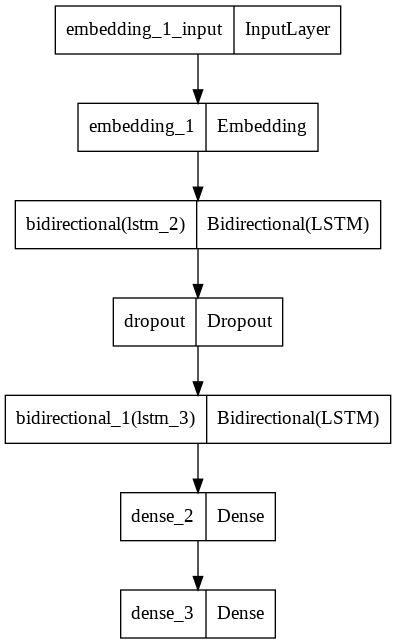

In [ ]:
keras.utils.plot_model(mdl_bilstm, to_file= 'plot_bilstm_lrnr.png', show_layer_names=True)

In [ ]:
chckpnt_bilstm = ModelCheckpoint("next_word_prediction_by_bilstm.h5", monitor="loss", verbose=1, save_best_only=True)
mdl_bilstm.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
training_hstry_bilstm = mdl_bilstm.fit(X_input, y_output, epochs=100, batch_size=64, callbacks=[chckpnt_bilstm])
print(mdl_bilstm)

Epoch 1/100
951/952 [============================>.] - ETA: 0s - loss: 6.6664 - accuracy: 0.1057
Epoch 1: loss improved from inf to 6.66594, saving model to next_word_prediction_by_bilstm.h5
952/952 [==============================] - 40s 36ms/step - loss: 6.6659 - accuracy: 0.1058
Epoch 2/100
952/952 [==============================] - ETA: 0s - loss: 6.1156 - accuracy: 0.1341
Epoch 2: loss improved from 6.66594 to 6.11559, saving model to next_word_prediction_by_bilstm.h5
952/952 [==============================] - 34s 36ms/step - loss: 6.1156 - accuracy: 0.1341
Epoch 3/100
952/952 [==============================] - ETA: 0s - loss: 5.7831 - accuracy: 0.1541
Epoch 3: loss improved from 6.11559 to 5.78314, saving model to next_word_prediction_by_bilstm.h5
952/952 [==============================] - 34s 36ms/step - loss: 5.7831 - accuracy: 0.1541
Epoch 4/100
951/952 [============================>.] - ETA: 0s - loss: 5.4806 - accuracy: 0.1677
Epoch 4: loss improved from 5.78314 to 5.48061, s

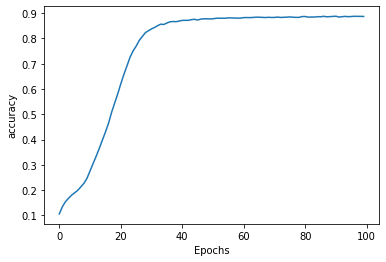

In [ ]:
ploting_achivement(training_hstry_bilstm, 'accuracy')

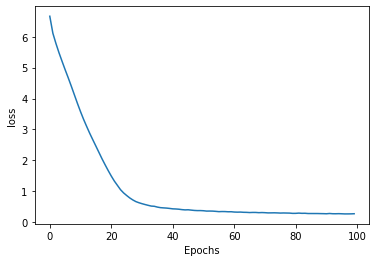

In [ ]:
ploting_achivement(training_hstry_bilstm, 'loss')

In [ ]:
# ACCURACY calculation
bilstm_loss_and_metrics = mdl_bilstm.evaluate(X_input, y_output, batch_size=64)
print("The accuracy of bi-LSTM model is: "+str(bilstm_loss_and_metrics[1]))

952/952 [==============================] - 16s 15ms/step - loss: 0.1928 - accuracy: 0.9152
The accuracy of bi-LSTM model is: 0.9152091145515442


#prediction

In [ ]:
mdl_bilstm = load_model("next_word_prediction_by_bilstm.h5")

In [ ]:
keyboard(mdl_bilstm, data_tknzr)

Enter string: The name of Rani Jhansi
['of', 'Rani', 'Jhansi']
would
Enter string: I am a good
['am', 'a', 'good']
of
Enter string: a woman entering into practical
['entering', 'into', 'practical']
affairs
Enter string: The heroic command
['The', 'heroic', 'command']
of
Enter string: the colour of the
['colour', 'of', 'the']
Something went wrong:  in user code:

    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/u

#GRU model for prediction 

In [ ]:
mdl_gru = Sequential()
mdl_gru.add(Embedding(vocabulary_length, 10, input_length=3))
mdl_gru.add(GRU(1000, return_sequences=True))
mdl_gru.add(GRU(1000))
mdl_gru.add(Dense(1000, activation="relu"))
mdl_gru.add(Dense(vocabulary_length, activation="softmax"))


In [ ]:
mdl_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 10)             76490     
                                                                 
 gru (GRU)                   (None, 3, 1000)           3036000   
                                                                 
 gru_1 (GRU)                 (None, 1000)              6006000   
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 7649)              7656649   
                                                                 
Total params: 17,776,139
Trainable params: 17,776,139
Non-trainable params: 0
_________________________________________________________________


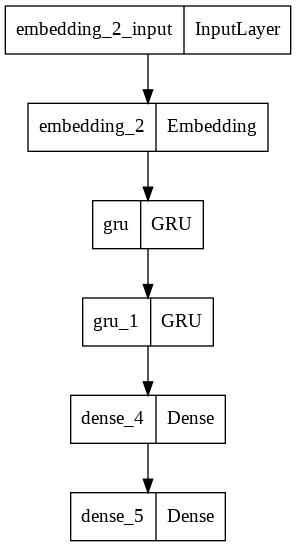

In [ ]:
keras.utils.plot_model(mdl_gru, to_file= 'image_of_gru_model.png', show_layer_names=True)

In [ ]:
chckpnt_gru = ModelCheckpoint("nxt_word_prediction_by_gru.h5", monitor="loss", verbose=1, save_best_only=True)
mdl_gru.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
training_hstry_gru = mdl_gru.fit(X_input, y_output, epochs=100, batch_size=64, callbacks=[chckpnt_gru])
print(mdl_gru)

Epoch 1/100
950/952 [============================>.] - ETA: 0s - loss: 6.6568 - accuracy: 0.1069
Epoch 1: loss improved from inf to 6.65722, saving model to nxt_word_prediction_by_gru.h5
952/952 [==============================] - 19s 16ms/step - loss: 6.6572 - accuracy: 0.1069
Epoch 2/100
951/952 [============================>.] - ETA: 0s - loss: 6.1021 - accuracy: 0.1361
Epoch 2: loss improved from 6.65722 to 6.10224, saving model to nxt_word_prediction_by_gru.h5
952/952 [==============================] - 16s 17ms/step - loss: 6.1022 - accuracy: 0.1361
Epoch 3/100
952/952 [==============================] - ETA: 0s - loss: 5.7632 - accuracy: 0.1543
Epoch 3: loss improved from 6.10224 to 5.76321, saving model to nxt_word_prediction_by_gru.h5
952/952 [==============================] - 16s 17ms/step - loss: 5.7632 - accuracy: 0.1543
Epoch 4/100
950/952 [============================>.] - ETA: 0s - loss: 5.4613 - accuracy: 0.1664
Epoch 4: loss improved from 5.76321 to 5.46095, saving model 

In [ ]:
mdl_gru = load_model("nxt_word_prediction_by_gru.h5")

In [ ]:
keyboard(mdl_gru, data_tknzr)

Enter string: Indian society is not opposed to the active participation of
['active', 'participation', 'of']
its
Enter string: of its women in the higher
['in', 'the', 'higher']
affairs
Enter string: she rode at the head of her
['head', 'of', 'her']
troops
Enter string: If the positive declarations of a group
['of', 'a', 'group']
of
Enter string: I am a good
['am', 'a', 'good']
man
Enter string: You are a good
['are', 'a', 'good']
boy
Enter string: The color of the
['color', 'of', 'the']
rest
Enter string: Trees are green
['Trees', 'are', 'green']
“hewers
Enter string: it is now by even the most orthodox of old Hindu
['of', 'old', 'Hindu']
ladies
Enter string: The name of Rani Jhansi is mentioned among the renowned heroes of the
['heroes', 'of', 'the']
country
Enter string: 0
Execution Finished...


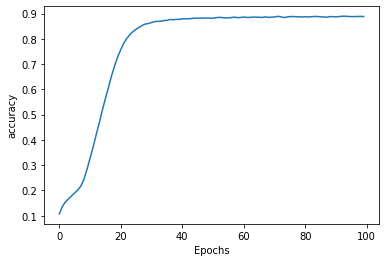

In [ ]:
ploting_achivement(training_hstry_gru, 'accuracy')

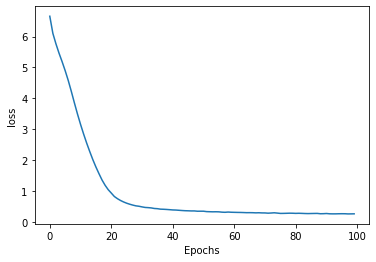

In [ ]:
ploting_achivement(training_hstry_gru, 'loss')

In [ ]:
#ACCURACY calculation
gru_loss_and_metrics = mdl_gru.evaluate(X_input, y_output, batch_size=64)
print("The accuracy is: "+str(gru_loss_and_metrics[1]))

952/952 [==============================] - 8s 8ms/step - loss: 0.2030 - accuracy: 0.9138
The accuracy is: 0.9138460755348206


#hybrid model

In [ ]:
mdl_hybrid = Sequential()

mdl_hybrid.add(Embedding(vocabulary_length, 10, input_length=3))
mdl_hybrid.add(GRU(1000, return_sequences=True))
mdl_hybrid.add(Conv1D(200, kernel_size=3, activation = "relu"))
mdl_hybrid.add(LSTM(1000, return_sequences=True))
mdl_hybrid.add(Dropout(0.5))
mdl_hybrid.add(LSTM(1000))
mdl_hybrid.add(Dense(1000, activation="relu"))
mdl_hybrid.add(Dense(vocabulary_length, activation="softmax"))

mdl_hybrid.add(Dense(1000, activation="relu"))
mdl_hybrid.add(Dense(vocabulary_length, activation="softmax"))

In [ ]:
mdl_hybrid.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 3, 10)             76490     
                                                                 
 gru_1 (GRU)                 (None, 3, 1000)           3036000   
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 200)            600200    
                                                                 
 lstm_2 (LSTM)               (None, 1, 1000)           4804000   
                                                                 
 dropout_2 (Dropout)         (None, 1, 1000)           0         
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_4 (Dense)             (None, 1000)             

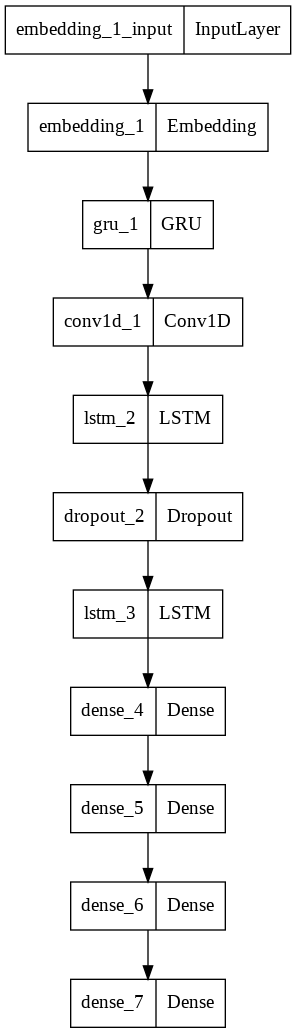

In [ ]:
keras.utils.plot_model(mdl_hybrid, to_file= 'final_imaging_hybrid_model.png', show_layer_names=True)

In [ ]:
chckpnt_hybrid = ModelCheckpoint("next_word_prediction_hybrid_mdl.h5", monitor="loss", verbose=1, save_best_only=True)
mdl_hybrid.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
training_hstry_hybrid = mdl_hybrid.fit(X_input, y_output, epochs=100, batch_size=64, callbacks=[chckpnt_hybrid])
print(mdl_hybrid)

Epoch 1/100
950/952 [============================>.] - ETA: 0s - loss: 6.9557 - accuracy: 0.0845
Epoch 1: loss improved from inf to 6.95534, saving model to next_word_prediction_hybrid_mdl.h5
952/952 [==============================] - 28s 25ms/step - loss: 6.9553 - accuracy: 0.0845
Epoch 2/100
951/952 [============================>.] - ETA: 0s - loss: 6.6803 - accuracy: 0.0846
Epoch 2: loss improved from 6.95534 to 6.68029, saving model to next_word_prediction_hybrid_mdl.h5
952/952 [==============================] - 23s 24ms/step - loss: 6.6803 - accuracy: 0.0846
Epoch 3/100
952/952 [==============================] - ETA: 0s - loss: 6.6653 - accuracy: 0.0846
Epoch 3: loss improved from 6.68029 to 6.66534, saving model to next_word_prediction_hybrid_mdl.h5
952/952 [==============================] - 23s 24ms/step - loss: 6.6653 - accuracy: 0.0846
Epoch 4/100
952/952 [==============================] - ETA: 0s - loss: 6.6639 - accuracy: 0.0846
Epoch 4: loss improved from 6.66534 to 6.66386

In [ ]:
mdl_hybrid = load_model("next_word_prediction_hybrid_mdl.h5")

In [ ]:
keyboard(mdl_hybrid, data_tknzr)

Enter string: The heroic command of
['heroic', 'command', 'of']
the
Enter string: I am a good
['am', 'a', 'good']
the
Enter string: the project gutenberb website
['project', 'gutenberb', 'website']
Something went wrong:  in user code:

    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(fi

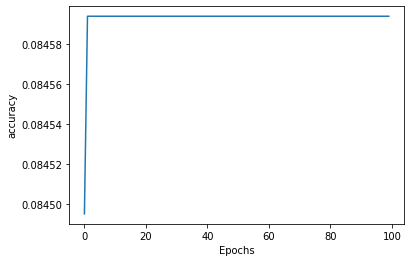

In [ ]:
ploting_achivement(training_hstry_hybrid, 'accuracy')

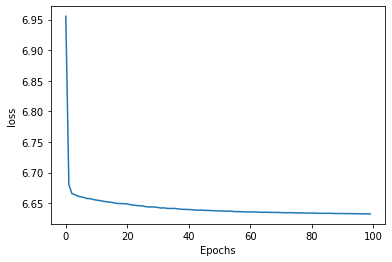

In [ ]:
ploting_achivement(training_hstry_hybrid, 'loss')

In [ ]:
#ACCURACY calculation
hybrid_loss_and_metrics = mdl_hybrid.evaluate(X_input, y_output, batch_size=64)
print("The accuracy is: "+str(hybrid_loss_and_metrics[1]))

952/952 [==============================] - 10s 10ms/step - loss: 6.6220 - accuracy: 0.0846
The accuracy is: 0.08459378033876419


In [ ]:
print("*****************Accuracy calculation and comparision of the explored models:   *********************")
print('\n')

print("LSTM model accuracy:                     "+str(lstm_loss_and_metrics[1]))
print('\n')

print("Bi-LSTM model accuracy:                "+str(bilstm_loss_and_metrics[1]))
print('\n')
print("GRU model accuracy:                        "+str(gru_loss_and_metrics[1]))
print('\n')
print("Hybrid model accuracy:                     "+str(hybrid_loss_and_metrics[1]))

*****************Accuracy calculation and comparision of the explored models:   *********************




NameError: ignored